In [1]:
from coffea.util import load
import hist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
output = load("output.coffea")

In [3]:
sum_gw = {}
def get_sum_gw(smpl):
    if smpl not in sum_gw:
        N = 0
        for dataset in output['sum_genweights']:
            if smpl+"_" in dataset:
                N += output['sum_genweights'][dataset]
        sum_gw[smpl] = N
    return sum_gw[smpl]
ef = {"pt": {}, "eta": {}, "pt_eta": {}}
for cat in output["custom_info"]['nevents']:
    ef["pt"][cat] = {}
    for pt in output["custom_info"]['nevents'][cat]:
        ef["pt"][cat][pt] = {}
        ef["pt"][cat][pt]["total_mc"] = 0
        ef["pt"][cat][pt]["total_data"] = 0
        for smpl in output["custom_info"]['nevents'][cat][pt]:
            if not "DATA_" in smpl and not "Signal_" in smpl:
                ef["pt"][cat][pt][smpl] = output["custom_info"]['nevents'][cat][pt][smpl]/output['sum_genweights'][smpl]
                ef["pt"][cat][pt]["total_mc"] += ef["pt"][cat][pt][smpl]
            elif "DATA_" in smpl:
                ef["pt"][cat][pt][smpl] = output["custom_info"]['nevents'][cat][pt][smpl]
                ef["pt"][cat][pt]["total_data"] += ef["pt"][cat][pt][smpl]
for cat in output["custom_info"]['nevents_eta']:
    ef["eta"][cat] = {}
    for eta in output["custom_info"]['nevents_eta'][cat]:
        ef["eta"][cat][eta] = {}
        ef["eta"][cat][eta]["total_mc"] = 0
        ef["eta"][cat][eta]["total_data"] = 0
        for smpl in output["custom_info"]['nevents_eta'][cat][eta]:
            if not "DATA_" in smpl and not "Signal_" in smpl:
                ef["eta"][cat][eta][smpl] = output["custom_info"]['nevents_eta'][cat][eta][smpl]/output['sum_genweights'][smpl]
                ef["eta"][cat][eta]["total_mc"] += ef["eta"][cat][eta][smpl]
            elif "DATA_" in smpl:
                ef["eta"][cat][eta][smpl] = output["custom_info"]['nevents_eta'][cat][eta][smpl]
                ef["eta"][cat][eta]["total_data"] += ef["eta"][cat][eta][smpl]
for cat in output["custom_info"]['nevents_2dim']:
    ef["pt_eta"][cat] = {}
    for pt in output["custom_info"]['nevents_2dim'][cat]:
        ef["pt_eta"][cat][pt] = {}
        for eta in output["custom_info"]['nevents_2dim'][cat][pt]:
            ef["pt_eta"][cat][pt][eta] = {}
            ef["pt_eta"][cat][pt][eta]["total_mc"] = 0
            ef["pt_eta"][cat][pt][eta]["total_data"] = 0
            for dataset in output["custom_info"]['nevents_2dim'][cat][pt][eta]:
                if not "DATA_" in dataset and not "Signal_" in dataset:
                    ef["pt_eta"][cat][pt][eta][dataset] = output["custom_info"]['nevents_2dim'][cat][pt][eta][dataset]/output['sum_genweights'][dataset]
                    ef["pt_eta"][cat][pt][eta]["total_mc"] += ef["pt_eta"][cat][pt][eta][dataset]
                elif "DATA_" in dataset:
                    ef["pt_eta"][cat][pt][eta][dataset] = output["custom_info"]['nevents_2dim'][cat][pt][eta][dataset]
                    ef["pt_eta"][cat][pt][eta]["total_data"] += ef["pt_eta"][cat][pt][eta][dataset]

In [4]:
EF = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_err = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_eta = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_eta_err = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_pt_eta = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_pt_eta_err = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
for pt_interval in ef["pt"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["pt"]["CRB"][pt_interval][smpl]
        n_crc = ef["pt"]["CRC"][pt_interval][smpl]
        n_crd = ef["pt"]["CRD"][pt_interval][smpl]
        n_plj = ef["pt"]["PLJ"][pt_interval][smpl]
        EF[smpl]["b1"][pt_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_err[smpl]["b1"][pt_interval] = EF[smpl]["b1"][pt_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
for pt_interval in ef["pt"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["pt"]["b0_CRB"][pt_interval][smpl]
        n_crc = ef["pt"]["b0_CRC"][pt_interval][smpl]
        n_crd = ef["pt"]["b0_CRD"][pt_interval][smpl]
        n_plj = ef["pt"]["b0_PLJ"][pt_interval][smpl]
        EF[smpl]["b0"][pt_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_err[smpl]["b0"][pt_interval] = EF[smpl]["b0"][pt_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
    
for eta_interval in ef["eta"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["eta"]["CRB"][eta_interval][smpl]
        n_crc = ef["eta"]["CRC"][eta_interval][smpl]
        n_crd = ef["eta"]["CRD"][eta_interval][smpl]
        n_plj = ef["eta"]["PLJ"][eta_interval][smpl]
        EF_eta[smpl]["b1"][eta_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_eta_err[smpl]["b1"][eta_interval] = EF_eta[smpl]["b1"][eta_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
for eta_interval in ef["eta"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["eta"]["b0_CRB"][eta_interval][smpl]
        n_crc = ef["eta"]["b0_CRC"][eta_interval][smpl]
        n_crd = ef["eta"]["b0_CRD"][eta_interval][smpl]
        n_plj = ef["eta"]["b0_PLJ"][eta_interval][smpl]
        EF_eta[smpl]["b0"][eta_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_eta_err[smpl]["b0"][eta_interval] = EF_eta[smpl]["b0"][eta_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)

for smpl in ["total_data", "total_mc"]:
    for pt_interval in ef["pt_eta"]["PLJ"]:
        EF_pt_eta[smpl]["b1"][pt_interval] = {}
        EF_pt_eta_err[smpl]["b1"][pt_interval] = {}
        for eta in ef["pt_eta"]["PLJ"][pt_interval]:
            n_crb = ef["pt_eta"]["CRB"][pt_interval][eta][smpl]
            n_crc = ef["pt_eta"]["CRC"][pt_interval][eta][smpl]
            n_crd = ef["pt_eta"]["CRD"][pt_interval][eta][smpl]
            n_plj = ef["pt_eta"]["PLJ"][pt_interval][eta][smpl]
            EF_pt_eta[smpl]["b1"][pt_interval][eta] = ((n_crb*n_crc)/n_crd)/n_plj    
            EF_pt_eta_err[smpl]["b1"][pt_interval][eta] = EF_pt_eta[smpl]["b1"][pt_interval][eta] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
for smpl in ["total_data", "total_mc"]:
    for pt_interval in ef["pt_eta"]["PLJ"]:
        EF_pt_eta[smpl]["b0"][pt_interval] = {}
        EF_pt_eta_err[smpl]["b0"][pt_interval] = {}
        for eta in ef["pt_eta"]["PLJ"][pt_interval]:
            n_crb = ef["pt_eta"]["b0_CRB"][pt_interval][eta][smpl]
            n_crc = ef["pt_eta"]["b0_CRC"][pt_interval][eta][smpl]
            n_crd = ef["pt_eta"]["b0_CRD"][pt_interval][eta][smpl]
            n_plj = ef["pt_eta"]["b0_PLJ"][pt_interval][eta][smpl]
            EF_pt_eta[smpl]["b0"][pt_interval][eta] = ((n_crb*n_crc)/n_crd)/n_plj    
            EF_pt_eta_err[smpl]["b0"][pt_interval][eta] = EF_pt_eta[smpl]["b0"][pt_interval][eta] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)


In [5]:
EF

{'total_data': {'b1': {'[60, 80]': 0.0797984974562149,
   '[80, 100]': 0.07061471098431123,
   '[100, 140]': 0.06292366550857438,
   '[140, np.inf]': 0.059578714828307885},
  'b0': {'[60, 80]': 0.10411184521780673,
   '[80, 100]': 0.08726479750778816,
   '[100, 140]': 0.07494204259416257,
   '[140, np.inf]': 0.059064294741642286}},
 'total_mc': {'b1': {'[60, 80]': 0.07786186989326621,
   '[80, 100]': 0.06702413690099676,
   '[100, 140]': 0.05740973401393479,
   '[140, np.inf]': 0.03781270066558324},
  'b0': {'[60, 80]': 0.11377428809661827,
   '[80, 100]': 0.07485103387325473,
   '[100, 140]': 0.07900637161355878,
   '[140, np.inf]': 0.06164948625076143}}}

In [6]:
EF_err

{'total_data': {'b1': {'[60, 80]': 0.004952438144717445,
   '[80, 100]': 0.006157660842632962,
   '[100, 140]': 0.006196786275936147,
   '[140, np.inf]': 0.0070716406358942475},
  'b0': {'[60, 80]': 0.0019529911716189687,
   '[80, 100]': 0.0025325761386428107,
   '[100, 140]': 0.0025243795720266966,
   '[140, np.inf]': 0.0027649516970251146}},
 'total_mc': {'b1': {'[60, 80]': 0.004989563153544967,
   '[80, 100]': 0.006243490049642035,
   '[100, 140]': 0.006063099333102375,
   '[140, np.inf]': 0.005420471857753463},
  'b0': {'[60, 80]': 0.002804702861676961,
   '[80, 100]': 0.003003728020611015,
   '[100, 140]': 0.003424455351840701,
   '[140, np.inf]': 0.0037988264386336124}}}

In [7]:
for cat in ef["pt"]:
    for pt in ef["pt"][cat]:
        print(cat, pt, ef["pt"][cat][pt]["total_data"])
        print(cat, pt, ef["pt"][cat][pt]["total_mc"])

PLJ [60, 80] 2294
PLJ [60, 80] 2582.5613412871894
PLJ [80, 100] 1111
PLJ [80, 100] 1196.7767791986287
PLJ [100, 140] 905
PLJ [100, 140] 950.8959183179516
PLJ [140, np.inf] 684
PLJ [140, np.inf] 615.2679148412575
CRB [60, 80] 385
CRB [60, 80] 336.91721852767233
CRB [80, 100] 197
CRB [80, 100] 158.37200723101967
CRB [100, 140] 150
CRB [100, 140] 120.9605519510611
CRB [140, np.inf] 99
CRB [140, np.inf] 61.24539437165078
CRC [60, 80] 1803
CRC [60, 80] 2125.614972569588
CRC [80, 100] 859
CRC [80, 100] 986.1575235986949
CRC [100, 140] 716
CRC [100, 140] 790.9540223431067
CRC [140, np.inf] 559
CRC [140, np.inf] 531.4699453130705
CRD [60, 80] 3792
CRD [60, 80] 3561.494943949962
CRD [80, 100] 2157
CRD [80, 100] 1947.0644585215973
CRD [100, 140] 1886
CRD [100, 140] 1752.5744696950637
CRD [140, np.inf] 1358
CRD [140, np.inf] 1399.1045886416864
b0_PLJ [60, 80] 22091
b0_PLJ [60, 80] 14564.25848513875
b0_PLJ [80, 100] 9309
b0_PLJ [80, 100] 6065.469350128675
b0_PLJ [100, 140] 7082
b0_PLJ [100, 140] 5

In [8]:
EF_eta

{'total_data': {'b1': {'[-1.5, -1]': 0.09224923667154743,
   '[-1, -0.5]': 0.06398205398384328,
   '[-0.5, 0]': 0.06538691307314072,
   '[0, 0.5]': 0.055831826401446655,
   '[0.5, 1]': 0.07087192341962395,
   '[1, 1.5]': 0.10013459430068902},
  'b0': {'[-1.5, -1]': 0.10629777526673242,
   '[-1, -0.5]': 0.08317728897030943,
   '[-0.5, 0]': 0.08057343483879141,
   '[0, 0.5]': 0.08099507063507402,
   '[0.5, 1]': 0.0878963748002355,
   '[1, 1.5]': 0.1135555670611887}},
 'total_mc': {'b1': {'[-1.5, -1]': 0.0760853865508852,
   '[-1, -0.5]': 0.06760553244941435,
   '[-0.5, 0]': 0.051985342217578466,
   '[0, 0.5]': 0.05581290104901566,
   '[0.5, 1]': 0.06302009329575789,
   '[1, 1.5]': 0.09024111710256198},
  'b0': {'[-1.5, -1]': 0.1070695226104874,
   '[-1, -0.5]': 0.07105003952594699,
   '[-0.5, 0]': 0.08419812460151081,
   '[0, 0.5]': 0.08866707750175006,
   '[0.5, 1]': 0.10442272985606307,
   '[1, 1.5]': 0.10487893686275573}}}

In [9]:
EF_eta_err

{'total_data': {'b1': {'[-1.5, -1]': 0.010400043138792484,
   '[-1, -0.5]': 0.006618626701043963,
   '[-0.5, 0]': 0.006409427913631064,
   '[0, 0.5]': 0.00573057672635082,
   '[0.5, 1]': 0.0068483073893513945,
   '[1, 1.5]': 0.010890788890435887},
  'b0': {'[-1.5, -1]': 0.0038991673660456567,
   '[-1, -0.5]': 0.0027553351215242653,
   '[-0.5, 0]': 0.0025885076550290747,
   '[0, 0.5]': 0.0025691039221600724,
   '[0.5, 1]': 0.0028171043994802735,
   '[1, 1.5]': 0.0040365415988260185}},
 'total_mc': {'b1': {'[-1.5, -1]': 0.008914921880902649,
   '[-1, -0.5]': 0.006859111161734489,
   '[-0.5, 0]': 0.005842034588527706,
   '[0, 0.5]': 0.005840641493523318,
   '[0.5, 1]': 0.006861479509462652,
   '[1, 1.5]': 0.010661664850314626},
  'b0': {'[-1.5, -1]': 0.005147379282240246,
   '[-1, -0.5]': 0.0032825686589656464,
   '[-0.5, 0]': 0.003629215725308357,
   '[0, 0.5]': 0.003619974353740184,
   '[0.5, 1]': 0.004356266009124173,
   '[1, 1.5]': 0.004864724439843158}}}

EF [0.0797984974562149, 0.07061471098431123, 0.06292366550857438, 0.059578714828307885]
EF_err [0.004952438144717445, 0.006157660842632962, 0.006196786275936147, 0.0070716406358942475]


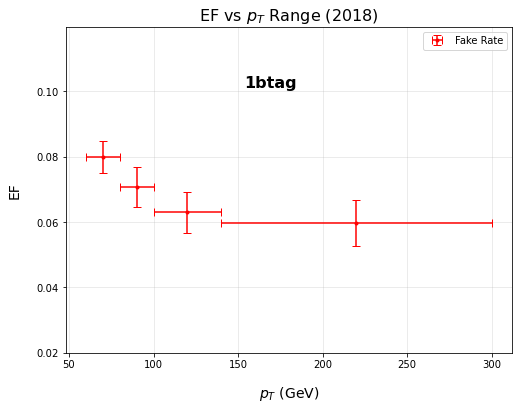

In [10]:
total_EF = []
total_EF_err = []

for pt in EF["total_data"]["b1"].keys():
    total_EF.append(EF["total_data"]["b1"][pt])
for pt in EF_err["total_data"]["b1"].keys():
    total_EF_err.append(EF_err["total_data"]["b1"][pt])

print ("EF", total_EF)
print("EF_err", total_EF_err)
pt = [70, 90, 120, 220]
pt_err = [10, 10, 20, 80]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(pt, total_EF, yerr=total_EF_err, xerr=pt_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$p_T$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
ax.set_title("EF vs $p_T$ Range (2018)", fontsize=16)
plt.ylim(0.02, max(total_EF)*1.5)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "1btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')


#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_pt_1b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.07786186989326621, 0.06702413690099676, 0.05740973401393479, 0.03781270066558324]
EF_err [0.004989563153544967, 0.006243490049642035, 0.006063099333102375, 0.005420471857753463]


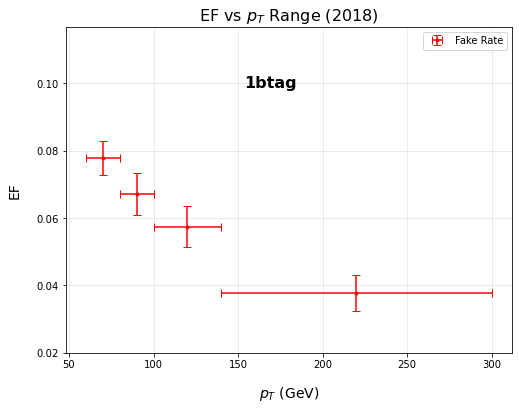

In [21]:
total_EF = []
total_EF_err = []

for pt in EF["total_mc"]["b1"].keys():
    total_EF.append(EF["total_mc"]["b1"][pt])
for pt in EF_err["total_mc"]["b1"].keys():
    total_EF_err.append(EF_err["total_mc"]["b1"][pt])

print ("EF", total_EF)
print("EF_err", total_EF_err)
pt = [70, 90, 120, 220]
pt_err = [10, 10, 20, 80]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(pt, total_EF, yerr=total_EF_err, xerr=pt_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$p_T$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
ax.set_title("EF vs $p_T$ Range (2018)", fontsize=16)
plt.ylim(0.02, max(total_EF)*1.5)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "1btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')


#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_pt_mc_1b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.10411184521780673, 0.08726479750778816, 0.07494204259416257, 0.059064294741642286]
EF_err [0.0019529911716189687, 0.0025325761386428107, 0.0025243795720266966, 0.0027649516970251146]


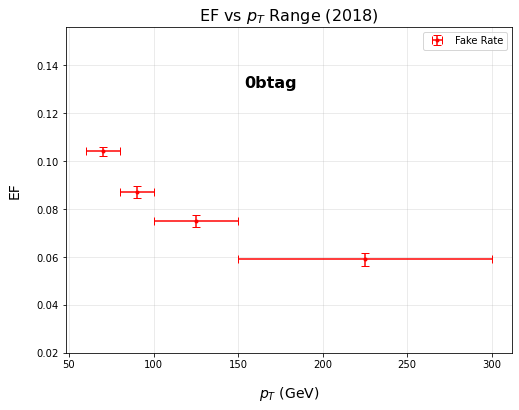

In [11]:
total_EF = []
total_EF_err = []

for pt in EF["total_data"]["b0"].keys():
    total_EF.append(EF["total_data"]["b0"][pt])
for pt in EF_err["total_data"]["b0"].keys():
    total_EF_err.append(EF_err["total_data"]["b0"][pt])

print ("EF", total_EF)
print("EF_err", total_EF_err)
pt = [70, 90, 125, 225]
pt_err = [10, 10, 25, 75]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(pt, total_EF, yerr=total_EF_err, xerr=pt_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$p_T$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
ax.set_title("EF vs $p_T$ Range (2018)", fontsize=16)
plt.ylim(0.02, max(total_EF)*1.5)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "0btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')


#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_pt_0b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.11377428809661827, 0.07485103387325473, 0.07900637161355878, 0.06164948625076143]
EF_err [0.002804702861676961, 0.003003728020611015, 0.003424455351840701, 0.0037988264386336124]


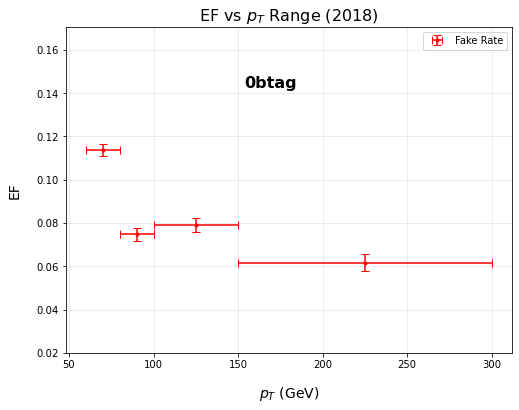

In [22]:
total_EF = []
total_EF_err = []

for pt in EF["total_mc"]["b0"].keys():
    total_EF.append(EF["total_mc"]["b0"][pt])
for pt in EF_err["total_mc"]["b0"].keys():
    total_EF_err.append(EF_err["total_mc"]["b0"][pt])

print ("EF", total_EF)
print("EF_err", total_EF_err)
pt = [70, 90, 125, 225]
pt_err = [10, 10, 25, 75]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(pt, total_EF, yerr=total_EF_err, xerr=pt_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$p_T$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
ax.set_title("EF vs $p_T$ Range (2018)", fontsize=16)
plt.ylim(0.02, max(total_EF)*1.5)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "0btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')


#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_pt_mc_0b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.09224923667154743, 0.06398205398384328, 0.06538691307314072, 0.055831826401446655, 0.07087192341962395, 0.10013459430068902]
EF_err [0.010400043138792484, 0.006618626701043963, 0.006409427913631064, 0.00573057672635082, 0.0068483073893513945, 0.010890788890435887]


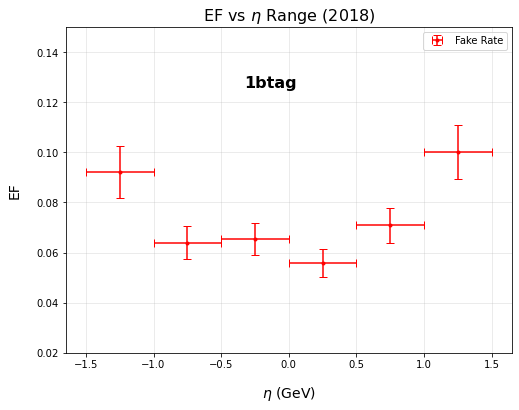

In [12]:
total_EF = []
total_EF_err = []

for eta in EF_eta["total_data"]["b1"].keys():
    total_EF.append(EF_eta["total_data"]["b1"][eta])
for eta in EF_eta_err["total_data"]["b1"].keys():
    total_EF_err.append(EF_eta_err["total_data"]["b1"][eta])

print ("EF", total_EF)
print("EF_err", total_EF_err)
eta = [-1.25,-0.75,-0.25,0.25,0.75,1.25]
eta_err = 0.25#,5,10,15,20,30,200]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(eta, total_EF, yerr=total_EF_err, xerr=eta_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$\eta$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
plt.ylim(0.02, max(total_EF)*1.5)
ax.set_title("EF vs $\eta$ Range (2018)", fontsize=16)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "1btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')


#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_eta_1b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.0760853865508852, 0.06760553244941435, 0.051985342217578466, 0.05581290104901566, 0.06302009329575789, 0.09024111710256198]
EF_err [0.008914921880902649, 0.006859111161734489, 0.005842034588527706, 0.005840641493523318, 0.006861479509462652, 0.010661664850314626]


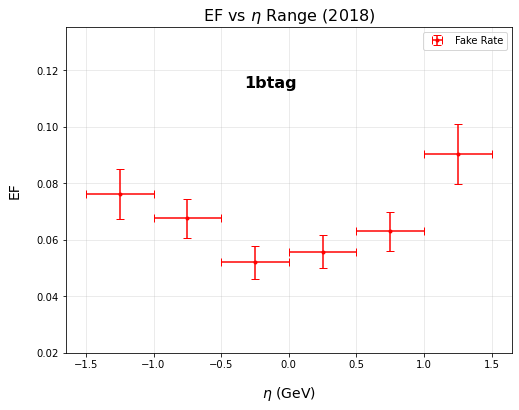

In [23]:
total_EF = []
total_EF_err = []

for eta in EF_eta["total_mc"]["b1"].keys():
    total_EF.append(EF_eta["total_mc"]["b1"][eta])
for eta in EF_eta_err["total_mc"]["b1"].keys():
    total_EF_err.append(EF_eta_err["total_mc"]["b1"][eta])

print ("EF", total_EF)
print("EF_err", total_EF_err)
eta = [-1.25,-0.75,-0.25,0.25,0.75,1.25]
eta_err = 0.25#,5,10,15,20,30,200]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(eta, total_EF, yerr=total_EF_err, xerr=eta_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$\eta$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
plt.ylim(0.02, max(total_EF)*1.5)
ax.set_title("EF vs $\eta$ Range (2018)", fontsize=16)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "1btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')


#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_eta_mc_1b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.10629777526673242, 0.08317728897030943, 0.08057343483879141, 0.08099507063507402, 0.0878963748002355, 0.1135555670611887]
EF_err [0.0038991673660456567, 0.0027553351215242653, 0.0025885076550290747, 0.0025691039221600724, 0.0028171043994802735, 0.0040365415988260185]


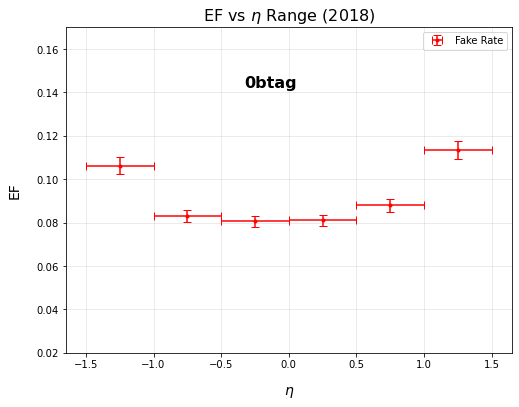

In [13]:
total_EF = []
total_EF_err = []

for eta in EF_eta["total_data"]["b0"].keys():
    total_EF.append(EF_eta["total_data"]["b0"][eta])
for eta in EF_eta_err["total_data"]["b0"].keys():
    total_EF_err.append(EF_eta_err["total_data"]["b0"][eta])

print ("EF", total_EF)
print("EF_err", total_EF_err)
eta = [-1.25,-0.75,-0.25,0.25,0.75,1.25]
eta_err = 0.25#,5,10,15,20,30,200]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(eta, total_EF, yerr=total_EF_err, xerr=eta_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$\eta$", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
plt.ylim(0.02, max(total_EF)*1.5)
ax.set_title("EF vs $\eta$ Range (2018)", fontsize=16)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "0btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')

#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_eta_0b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.1070695226104874, 0.07105003952594699, 0.08419812460151081, 0.08866707750175006, 0.10442272985606307, 0.10487893686275573]
EF_err [0.005147379282240246, 0.0032825686589656464, 0.003629215725308357, 0.003619974353740184, 0.004356266009124173, 0.004864724439843158]


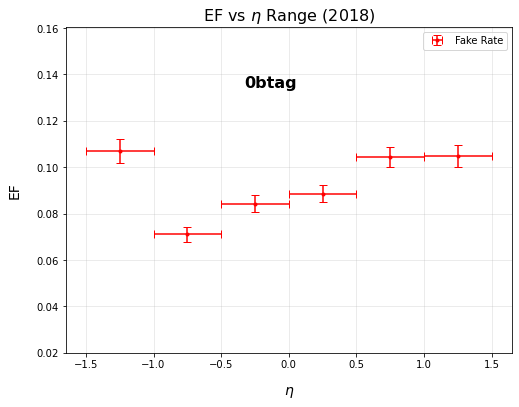

In [24]:
total_EF = []
total_EF_err = []

for eta in EF_eta["total_mc"]["b0"].keys():
    total_EF.append(EF_eta["total_mc"]["b0"][eta])
for eta in EF_eta_err["total_mc"]["b0"].keys():
    total_EF_err.append(EF_eta_err["total_mc"]["b0"][eta])

print ("EF", total_EF)
print("EF_err", total_EF_err)
eta = [-1.25,-0.75,-0.25,0.25,0.75,1.25]
eta_err = 0.25#,5,10,15,20,30,200]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(eta, total_EF, yerr=total_EF_err, xerr=eta_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$\eta$", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
plt.ylim(0.02, max(total_EF)*1.5)
ax.set_title("EF vs $\eta$ Range (2018)", fontsize=16)
ax.grid(alpha=0.3)
ax.legend()
ax.text(0.4, 0.85, "0btag", transform=ax.transAxes, 
               fontsize=16, fontweight='bold', va='top')

#fig.tight_layout()
fig.savefig("ef_plots/FAKERATE_eta_mc_0b.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

In [14]:
EF_pt_eta

{'total_data': {'b1': {'[60, 80]': {'[-1.5, -1]': 0.09677594064078857,
    '[-1, -0.5]': 0.07780712599752725,
    '[-0.5, 0]': 0.06882024247481068,
    '[0, 0.5]': 0.06954755873875448,
    '[0.5, 1]': 0.08148583585264808,
    '[1, 1.5]': 0.09812014266357251},
   '[80, 100]': {'[-1.5, -1]': 0.0945179584120983,
    '[-1, -0.5]': 0.06291286568103177,
    '[-0.5, 0]': 0.06053196053196053,
    '[0, 0.5]': 0.051604012788005735,
    '[0.5, 1]': 0.07065217391304347,
    '[1, 1.5]': 0.11187260632936907},
   '[100, 140]': {'[-1.5, -1]': 0.0912854824285383,
    '[-1, -0.5]': 0.04742803209060878,
    '[-0.5, 0]': 0.05837837837837837,
    '[0, 0.5]': 0.043472515856236786,
    '[0.5, 1]': 0.056776371308016875,
    '[1, 1.5]': 0.10820895522388059},
   '[140, np.inf]': {'[-1.5, -1]': 0.0726072607260726,
    '[-1, -0.5]': 0.04566677326511032,
    '[-0.5, 0]': 0.07354269346889272,
    '[0, 0.5]': 0.04317132772196579,
    '[0.5, 1]': 0.06325439266615737,
    '[1, 1.5]': 0.0696062675773403}},
  'b0': {'[6

In [15]:
EF_pt_eta_err

{'total_data': {'b1': {'[60, 80]': {'[-1.5, -1]': 0.016405688139640735,
    '[-1, -0.5]': 0.011165436689994916,
    '[-0.5, 0]': 0.010224069795194761,
    '[0, 0.5]': 0.010308916504580722,
    '[0.5, 1]': 0.011806377492087038,
    '[1, 1.5]': 0.0161681769715269},
   '[80, 100]': {'[-1.5, -1]': 0.022019498038458457,
    '[-1, -0.5]': 0.014142060254903888,
    '[-0.5, 0]': 0.012471643270917416,
    '[0, 0.5]': 0.011090612140373782,
    '[0.5, 1]': 0.014123588073309318,
    '[1, 1.5]': 0.02388687185391596},
   '[100, 140]': {'[-1.5, -1]': 0.022326642045519304,
    '[-1, -0.5]': 0.012770034692825815,
    '[-0.5, 0]': 0.013658512083044257,
    '[0, 0.5]': 0.010909526700647383,
    '[0.5, 1]': 0.01295935181500086,
    '[1, 1.5]': 0.025865030334284708},
   '[140, np.inf]': {'[-1.5, -1]': 0.025220061814870767,
    '[-1, -0.5]': 0.013962436071050905,
    '[-0.5, 0]': 0.017932202206691075,
    '[0, 0.5]': 0.012764625009237836,
    '[0.5, 1]': 0.016327611336030716,
    '[1, 1.5]': 0.0248615804917

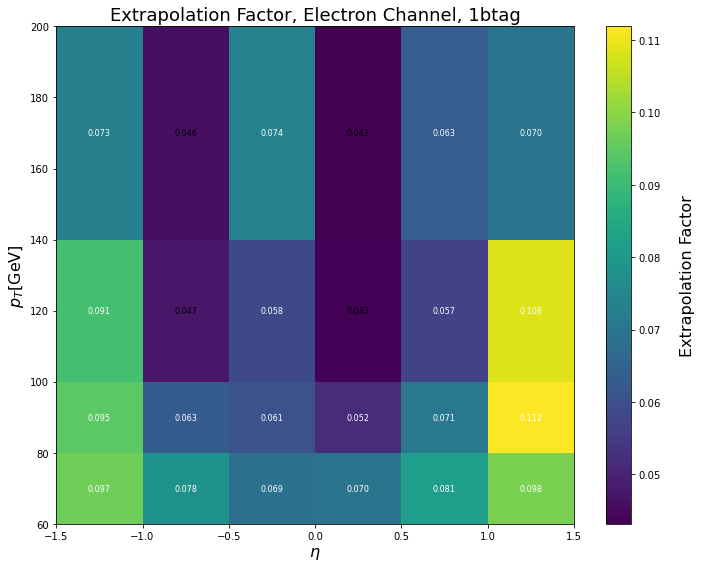

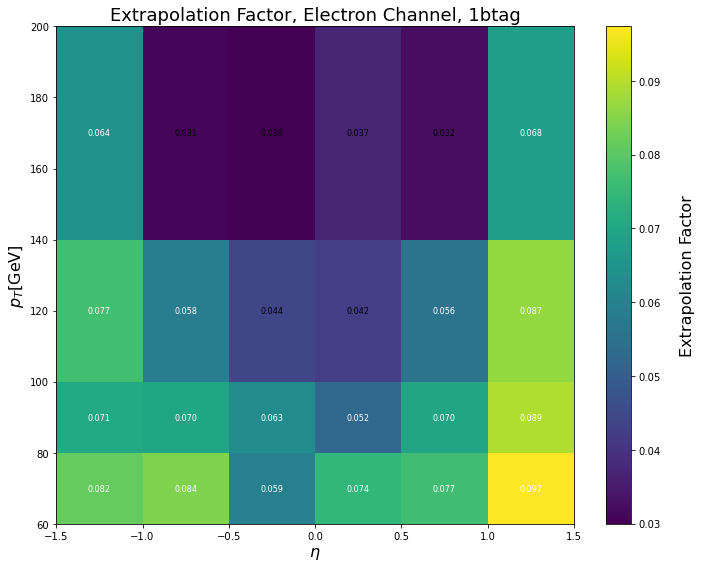

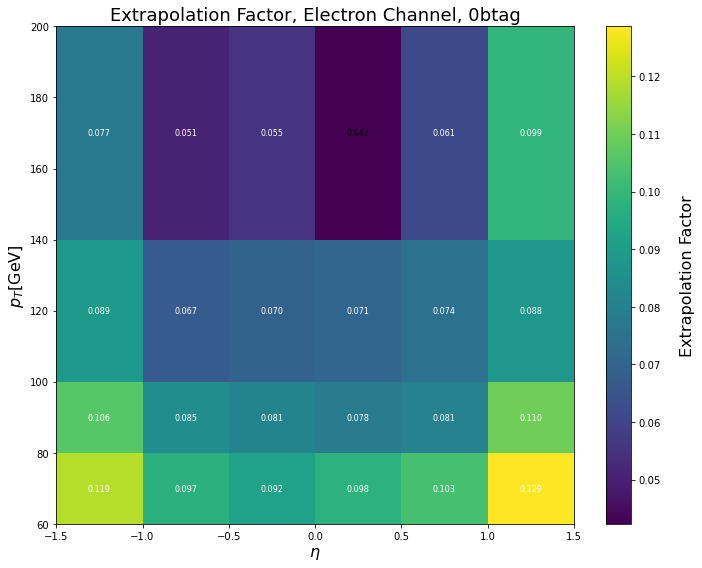

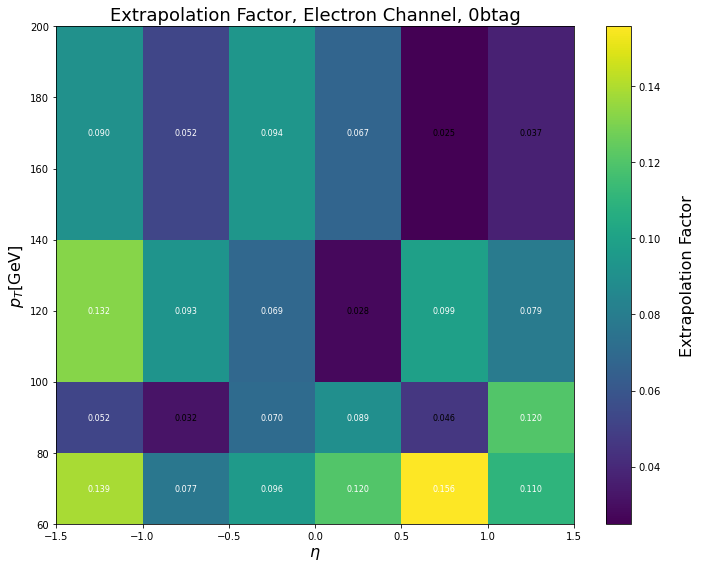

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_weights_2d_improved(weights_dict, category='total_data', bin_type='b1'):
    """
    Improved version with better bin parsing and visualization
    """
    
    data = weights_dict[category][bin_type]
    
    # Extract all unique bin edges
    pt_edges_set = set()
    eta_edges_set = set()
    
    for pt_bin_str in data.keys():
        pt_match = re.findall(r'[\d.]+|np\.inf', pt_bin_str)
        if len(pt_match) == 2:
            pt_edges_set.add(float(pt_match[0]))
            pt_max = float('inf') if pt_match[1] == 'np.inf' else float(pt_match[1])
            pt_edges_set.add(pt_max)
    
    for pt_bin_str, eta_dict in data.items():
        for eta_bin_str in eta_dict.keys():
            eta_match = re.findall(r'[-]?[\d.]+', eta_bin_str)
            if len(eta_match) == 2:
                eta_edges_set.add(float(eta_match[0]))
                eta_edges_set.add(float(eta_match[1]))
    
    # Convert to sorted lists
    pt_edges = sorted(pt_edges_set)
    eta_edges = sorted(eta_edges_set)
    
    # Replace inf with a reasonable maximum for plotting
    pt_max_plot = 200  # You can adjust this based on your data
    pt_edges_plot = [x if x != float('inf') else pt_max_plot for x in pt_edges]
    
    # Create weight matrix
    weight_matrix = np.zeros((len(pt_edges)-1, len(eta_edges)-1))
    
    # Fill weight matrix
    for pt_bin_str, eta_dict in data.items():
        pt_match = re.findall(r'[\d.]+|np\.inf', pt_bin_str)
        pt_min = float(pt_match[0])
        pt_max = float('inf') if pt_match[1] == 'np.inf' else float(pt_match[1])
        
        pt_idx = pt_edges.index(pt_min)
        
        for eta_bin_str, weight in eta_dict.items():
            eta_match = re.findall(r'[-]?[\d.]+', eta_bin_str)
            eta_min = float(eta_match[0])
            eta_max = float(eta_match[1])
            
            eta_idx = eta_edges.index(eta_min)
            weight_matrix[pt_idx, eta_idx] = weight
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create meshgrid
    X, Y = np.meshgrid(eta_edges, pt_edges_plot)
    
    # Plot
    mesh = ax.pcolormesh(X, Y, weight_matrix, cmap='viridis', shading='flat')
    
    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('Extrapolation Factor', rotation=90, labelpad=20, fontsize=16)
    
    # Labels and title
    ax.set_xlabel('$\eta$', fontsize=16)
    ax.set_ylabel('$p_T$[GeV]', fontsize=16)
    ax.set_title(f'Extrapolation Factor, Electron Channel, {bin_type[-1]}btag', fontsize=18)
    
    # Add value annotations
    for i in range(len(pt_edges)-1):
        for j in range(len(eta_edges)-1):
            if weight_matrix[i, j] > 0:
                eta_center = (eta_edges[j] + eta_edges[j+1]) / 2
                pt_center = (pt_edges_plot[i] + pt_edges_plot[i+1]) / 2
                ax.text(eta_center, pt_center, f'{weight_matrix[i, j]:.3f}', 
                       ha='center', va='center', fontsize=8, 
                       color='white' if weight_matrix[i, j] > 0.05 else 'black')
    
    # plt.grid(True, alpha=0.3)
    plt.tight_layout()
    fig.savefig(f"ef_plots/pt_eta_{category}_{bin_type}.png", bbox_inches="tight", pad_inches=0.2, facecolor="white") 
    plt.show()
    
    return weight_matrix, pt_edges, eta_edges

# Plot for total_data and b1
weight_matrix, pt_edges, eta_edges = plot_weights_2d_improved(EF_pt_eta, 'total_data', 'b1')
weight_matrix, pt_edges, eta_edges = plot_weights_2d_improved(EF_pt_eta, 'total_mc', 'b1')
weight_matrix, pt_edges, eta_edges = plot_weights_2d_improved(EF_pt_eta, 'total_data', 'b0')
weight_matrix, pt_edges, eta_edges = plot_weights_2d_improved(EF_pt_eta, 'total_mc', 'b0')